# 스튜던트 t 분포

## Fat tail 현상

데이터 분석 실무에서는 자연에서 발생하는 현상 중 많은 것들을 정규 분포를 따르는 확률 변수로 모형화하여 사용하고 있다. 그러나 이러한 데이터들을 자세히 살펴보면 실제로는 정규분포보다 양 끝단의 비중이 더 큰것을 알 수 있다. 이를 fat tail 현상이라고 한다.

예를 들어 주식의 수익률은 보통 정규 분포를 따르는 것으로 모형화하여 사용한다. 실제로 어느 정도 정규 분포를 따르는지 데이터에서 확인해 보자.

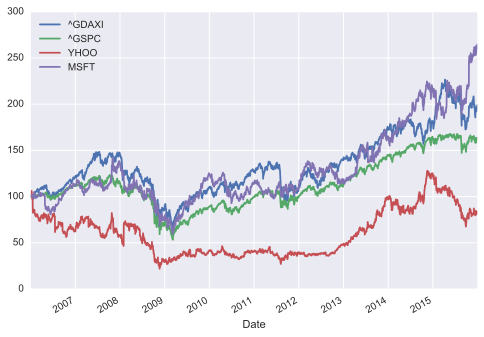

In [5]:
import pandas.io.data as web
symbols = ['^GDAXI', '^GSPC', 'YHOO', 'MSFT']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo', start='1/1/2006', end='12/31/2015')['Adj Close']
data = data.dropna()
(data / data.ix[0] * 100).plot()
plt.show()

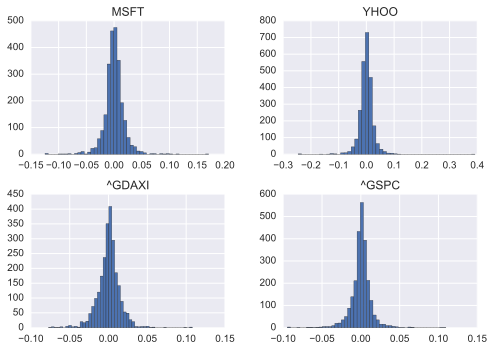

In [2]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

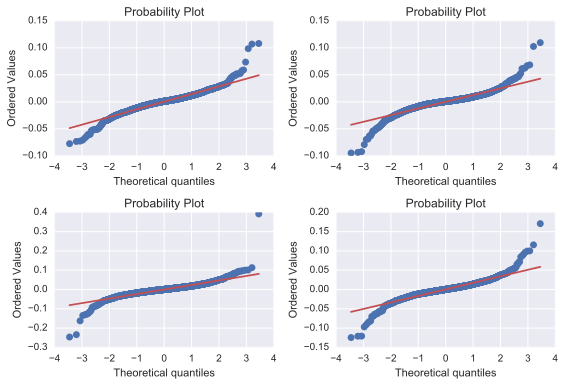

In [3]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2,2,i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()    

이렇게 Fat tail 을 가진 데이터 모형에 적합한 것이 다음에 정의하는 스튜던트 t 분포이다.

## 스튜던트 t 분포

스튜던트 t 분포의 확률 밀도 함수는 다음 수식에 의해 정의된다. 가우시안 정규 분포와 달리 정수값을 가지는 자유도(degree of freedom)라는 모수(parameter) $\nu$를 추가적으로 가진다.

$$ f(x) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{(x-\mu)^2}{\nu\sigma^2} \right)^{\!-\frac{\nu+1}{2}} $$


이 식에서 $\Gamma$는 감마(Gamma) 함수라는 특수 함수이다.

스튜던트 t 분포의 확률 밀도 함수를 그리려면 SciPy 패키지의 `t` 명령을 사용한다. 이 때 인수 `df`는 자유도, `loc`는 기댓값, `scale`은 표준 편차를 설정한다.

그림에서 자유도 $\nu$가 작으면 가우시안 정규 분포보다 분산이 크고 fat tail을 보이지만  자유도가 증가할수록 가우시안 정규 분포로 수렴하는 것을 볼 수 있다.

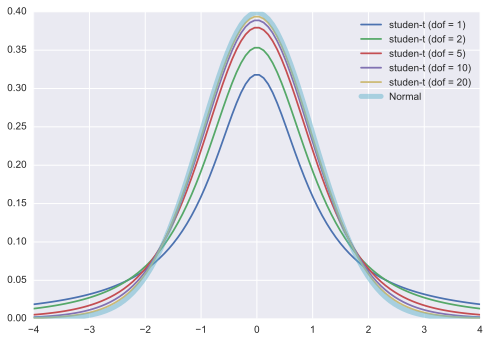

In [4]:
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("studen-t (dof = %d)" % df))
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.legend()    

## 모멘트

스튜던트 t 분포의 기댓값과 분산은 다음과 같다.

* 기댓값: $\text{E}[X] = 0 $

* 분산: $ \text{Var}[X] = \dfrac{\nu \sigma^2}{\nu-2} $


## 샘플 평균 분포

중심 극한 정리(Central Limit Theorem)에 따르면 모든 확률 변수의 합(또는 평균)은 샘플의 갯수가 증가할 수록 가우시안 정규 분포에 가까워진다.
그러면 샘플의 수가 무한대가 아닌 유한한 경우는 어떨까? 

가우시안 정규 분포로부터 얻은 $n$개의 샘플 $x_1, \cdots, x_n$ 로부터 정의한 다음과 같은 값은 자유도가 $n-1$인 스튜던트 t 분포를 이룬다.

$$  t = \frac{\bar{x} - \mu}{\dfrac{s}{\sqrt{n}}} $$

이 식에서 

$$ \bar{x} = \frac{x_1+\cdots+x_n}{n}  $$

$$ s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2 $$
